# 101. Symmetric Tree

## Question

Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).

## Example

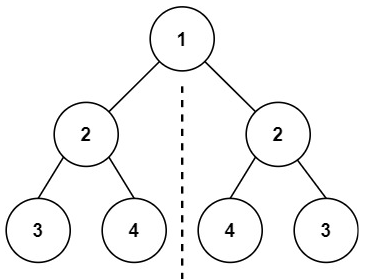

Input: root = [1,2,2,3,4,4,3]

Output: true


-----

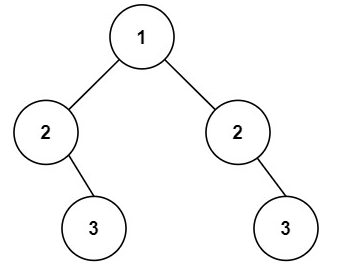

Input: root = [1,2,2,null,3,null,3]

Output: false

## My Solution

Idea:
1. Use Que(FIFO) for testing symmetry
    + Use depth first traversal
    + Left tree should be in the que -> compare with right tree by popping
    + Especially, pre-order traversal from `structures/trees/programmers/18, 19. Binary Trees`
    


2. Use Stack(LIFO) for testing symmetry
    + Use breadth first traversal
    + For each level, test whether left = right
    
    
-> It seemed difficult to use Stack for each level


3. Use Stack(LIFO)
    + Use loop
    
    
4. Use depth first traversal
    - Use pre-order traversal from `structures/trees/programmers/18, 19. Binary Trees`
        + For left tree: self -> left subtree -> right subtree
        + For right tree: self -> right subtree -> left subtree

In [5]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right


# Wrong answer in 72th test case
# [1, 2, 2, null, 3, null, 3]

class Solution(object):
    def left_preorder(self,root):
        traversal = []
        if root is None:
            traversal.append(None)
            return 
        traversal.append(root.val)
        if root.left:
            traversal += [self.left_preorder(root.left)]
        if root.right:
            traversal += [self.left_preorder(root.right)]
            
    def right_preorder(self,root):
        traversal = []
        if root is None:
            traversal.append(None)
            return 
        traversal.append(root.val)
        if root.right:
            traversal += [self.right_preorder(root.right)]
        if root.left:
            traversal += [self.right_preorder(root.left)]
        
    def isSymmetric(self, root):
        if self.left_preorder(root.left) == self.right_preorder(root.right):
            return True
        else:
            return False

In [7]:
# 72th test case fail
# [1, 2, 2, null, 3, null, 3]

class Solution(object):
    def isSymmetric(self, root):
        def left_preorder(root):
            traversal = []
            if root is None:
                traversal.append(None)
                return 
            traversal.append(root.val)
            if root.left:
                traversal += [left_preorder(root.left)]
            if root.right:
                traversal += [left_preorder(root.right)]

        def right_preorder(root):
            traversal = []
            if root is None:
                traversal.append(None)
                return 
            traversal.append(root.val)
            if root.left:
                traversal += [right_preorder(root.left)]
            if root.right:
                traversal += [right_preorder(root.right)]
        
        if root is None:
            return True
        else:
            if left_preorder(root.left) == right_preorder(root.right):
                return True
            else:
                return False 

In [ ]:
# 134th test case failed

class Solution(object):
    def isSymmetric(self, root):      
        def inorder_left(root):
            traversal = []
            if root is None:
                traversal.append('null')
                return
            if root.left:  
                traversal += inorder_left(root.left)  
            traversal.append(root.val)  #자기 자신 방문
            if root.right:
                traversal += inorder_right(root.right)
            return traversal
        
        def inorder_right(root):
            traversal = []
            if root is None:
                traversal.append('null')
                return
            if root.right:
                traversal += inorder_right(root.right)
            traversal.append(root.val)  #자기 자신 방문
            if root.left:  
                traversal += inorder_right(root.left)  

        
        if root is None:
            return True
        else:
            if inorder_left(root.left) == inorder_right(root.right):
                return True
            else:
                return False

## Other's solution.

- Use stack

In [10]:
class Solution(object):
    def isSymmetric(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
        if root == None:
            return True
        
        stack = []
        stack.append(root.right)
        stack.append(root.left)
        
        while(stack):
            leftNode = stack.pop()
            rightNode = stack.pop()
            
            if leftNode == None and rightNode == None:
                continue
                
            if leftNode == None or rightNode == None or (leftNode.val != rightNode.val):
                return False
            
            stack.append(leftNode.left)
            stack.append(rightNode.right)
            
            stack.append(leftNode.right)
            stack.append(rightNode.left)
            
        return True
    
#https://blog.devgenius.io/leetcode-101-symmetric-tree-87383ec51401

- Use inorder traversal

In [12]:
def isSymmetric(self, root):
        if root is None: 
            return True
        def dfs_left(root, res):
            if root is None:
                res.append(None)
                return
            res.append(root.val)
            dfs_left(root.left, res)
            dfs_left(root.right, res)
            return res
        def dfs_right(root, res):
            if root is None: 
                res.append(None)
                return
            res.append(root.val)
            dfs_right(root.right, res)
            dfs_right(root.left, res)
            return res
        return dfs_left(root.left, [])==dfs_right(root.right, []) 
    
# https://zhenyu0519.github.io/2020/03/12/lc101/